# Hodgkin-Huxley Model Simulation

In this notebook, we simulate the **Hodgkin-Huxley model**, which describes the dynamical behavior of a biological neuron. We will simulate the system of ODEs for the membrane potential and gating variables over time using typical parameters. The output will include a 3D plot of the gating variables and the evolution of the membrane potential.

## Step 1: Define the Hodgkin-Huxley Model

In [91]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Define the standard Hodgkin-Huxley ODE system
def hodgkin_huxley(t, y, I_ext):
    V, n, m, h = y

    # Hodgkin-Huxley parameters
    C_m = 1.0  # membrane capacitance, in uF/cm^2
    g_Na = 120.0  # maximum conductance of sodium channels, in mS/cm^2
    g_K = 36.0  # maximum conductance of potassium channels, in mS/cm^2
    g_L = 0.3  # leak conductance, in mS/cm^2
    E_Na = 50.0  # reversal potential for sodium, in mV
    E_K = -77.0  # reversal potential for potassium, in mV
    E_L = -54.387  # leak reversal potential, in mV

    # External input current (stimulus)
    I = I_ext(t)

    # Alpha and beta functions for gating variables
    alpha_n = (0.01 * (V + 55)) / (1 - np.exp(-(V + 55) / 10))
    beta_n = 0.125 * np.exp(-(V + 65) / 80)
    
    alpha_m = (0.1 * (V + 40)) / (1 - np.exp(-(V + 40) / 10))
    beta_m = 4.0 * np.exp(-(V + 65) / 18)
    
    alpha_h = 0.07 * np.exp(-(V + 65) / 20)
    beta_h = 1.0 / (1 + np.exp(-(V + 35) / 10))

    # Sodium and potassium channel currents
    I_Na = g_Na * (m ** 3) * h * (V - E_Na)
    I_K = g_K * (n ** 4) * (V - E_K)
    I_L = g_L * (V - E_L)

    # ODEs for the membrane potential and gating variables
    dVdt = (I - I_Na - I_K - I_L) / C_m
    dndt = alpha_n * (1 - n) - beta_n * n
    dmdt = alpha_m * (1 - m) - beta_m * m
    dhdt = alpha_h * (1 - h) - beta_h * h

    return [dVdt, dndt, dmdt, dhdt]

## Step 2: Define External Stimulus 
The external input current \( I_{ext}(t) \) will be a simple function, where a current of 10.0 mV is applied between 10 ms and 50 ms.

In [92]:
# Define external current stimulus (increases by 10 units every 100 ms until 500 ms)
def I_ext(t):
    if t >= 0 and t <= 199:
        return 20 * (t // 50)  # Increase by 10 every 100 ms
    else:
        return 60.0  # Cap the current at 50 units after 500 ms

## Step 3: Set Initial Conditions and Time Range for the Simulation

In [93]:
# Initial conditions: [V, n, m, h]
y0 = [-65.0, 0.32, 0.05, 0.6]  # starting values for the membrane potential and gating variables

# Time vector for simulation
t_span = [0, 200]  # simulate from 0 to 1000 ms
t_eval = np.linspace(0, 200, 2000)  # evaluation points for ODE solver

## Step 4: Solve the ODEs using `solve_ivp`

In [94]:
# Solve the ODE system
sol = solve_ivp(hodgkin_huxley, t_span, y0, args=(I_ext,), t_eval=t_eval)

# Extract results
V_vals = sol.y[0]  # membrane potential over time
n_vals = sol.y[1]  # potassium gating variable
m_vals = sol.y[2]  # sodium activation gating variable
h_vals = sol.y[3]  # sodium inactivation gating variable

## Step 5: Plot the Results

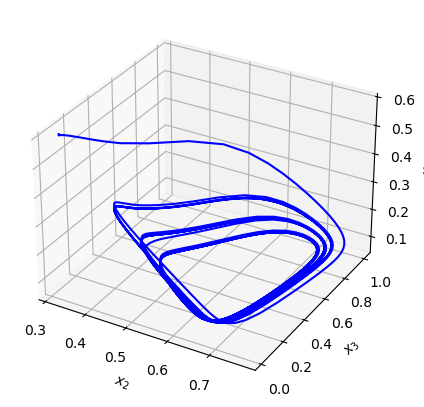

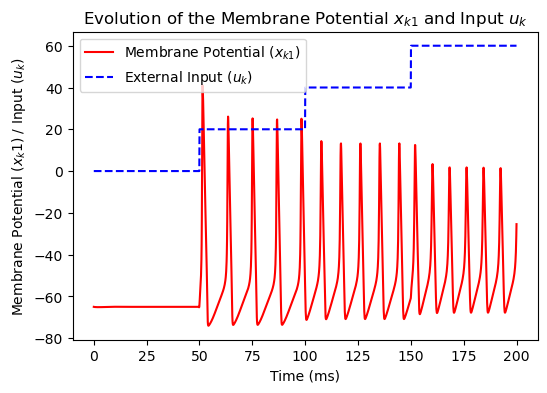

In [95]:
# Plotting results as two separate plots

# First plot: 3D plot of gating variables (n, m, h)
fig1 = plt.figure(figsize=(8, 5))
ax = fig1.add_subplot(111, projection='3d')
ax.plot(n_vals, m_vals, h_vals, color='b')
ax.set_xlabel('$x_2$')
ax.set_ylabel('$x_3$')
ax.set_zlabel('$x_4$')
#ax.set_title('Joint Evolution of Gating Variables ($x_2$, $x_3$, $x_4$)')
plt.show()

# Second plot: Evolution of membrane potential V over time
# Plot the results: Membrane potential and external input over time
# Compute the external current over time for plotting
I_vals = np.array([I_ext(t) for t in sol.t])
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(sol.t, V_vals, color='r', label='Membrane Potential ($x_{k1}$)')
ax.plot(sol.t, I_vals, color='b', label='External Input ($u_{k}$)', linestyle='--')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Membrane Potential ($x_k1$) / Input ($u_{k}$)')
ax.set_title('Evolution of the Membrane Potential $x_{k1}$ and Input $u_{k}$')
ax.legend()

plt.show()